In [255]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("survey_results_public.csv")

In [256]:
df.head()

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8


In [257]:
df = df[["Country", "EdLevel", "YearsCodePro", "Employment", "ConvertedComp","UndergradMajor"]]
df = df.rename({"ConvertedComp": "Salary"}, axis=1)
df.head()

,Country,EdLevel,YearsCodePro,Employment,Salary,UndergradMajor
0,Germany,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",27,"Independent contractor, freelancer, or self-em...",NaN,"Computer science, computer engineering, or sof..."
1,United Kingdom,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",4,Employed full-time,NaN,"Computer science, computer engineering, or sof..."
2,Russian Federation,NaN,NaN,NaN,NaN,NaN
3,Albania,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",4,NaN,NaN,"Computer science, computer engineering, or sof..."
4,United States,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",8,Employed full-time,NaN,"Computer science, computer engineering, or sof..."


In [258]:
df = df[df["Salary"].notnull()]
df.head()

,Country,EdLevel,YearsCodePro,Employment,Salary,UndergradMajor
7,United States,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",13,Employed full-time,116000.0,"Computer science, computer engineering, or sof..."
9,United Kingdom,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",4,Employed full-time,32315.0,Mathematics or statistics
10,United Kingdom,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",2,Employed full-time,40070.0,"Computer science, computer engineering, or sof..."
11,Spain,Some college/university study without earning ...,7,Employed full-time,14268.0,Mathematics or statistics
12,Netherlands,"Secondary school (e.g. American high school, G...",20,Employed full-time,38916.0,NaN


In [259]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34756 entries, 7 to 64154
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         34756 non-null  object 
 1   EdLevel         34188 non-null  object 
 2   YearsCodePro    34621 non-null  object 
 3   Employment      34717 non-null  object 
 4   Salary          34756 non-null  float64
 5   UndergradMajor  32228 non-null  object 
dtypes: float64(1), object(5)
memory usage: 1.9+ MB


In [260]:
df = df.dropna()
df.isnull().sum()

Country           0
EdLevel           0
YearsCodePro      0
Employment        0
Salary            0
UndergradMajor    0
dtype: int64

In [261]:
df = df[df["Employment"] == "Employed full-time"]
df = df.drop("Employment", axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28012 entries, 7 to 64154
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         28012 non-null  object 
 1   EdLevel         28012 non-null  object 
 2   YearsCodePro    28012 non-null  object 
 3   Salary          28012 non-null  float64
 4   UndergradMajor  28012 non-null  object 
dtypes: float64(1), object(4)
memory usage: 1.3+ MB


In [262]:
df['Country'].value_counts()

United States     7176
India             2354
United Kingdom    2101
Germany           1670
Canada            1116
                  ... 
Fiji                 1
San Marino           1
Benin                1
Turkmenistan         1
Andorra              1
Name: Country, Length: 154, dtype: int64

In [263]:
def shorten_categories(categories, cutoff):
    categorical_map = {}
    for i in range(len(categories)):
        if categories.values[i] >= cutoff:
            categorical_map[categories.index[i]] = categories.index[i]
        else:
            categorical_map[categories.index[i]] = 'Other'
    return categorical_map

In [264]:
country_map = shorten_categories(df.Country.value_counts(), 400)
df['Country'] = df['Country'].map(country_map)
df.Country.value_counts()

Other                 7947
United States         7176
India                 2354
United Kingdom        2101
Germany               1670
Canada                1116
France                 939
Brazil                 929
Spain                  635
Australia              626
Netherlands            599
Poland                 516
Russian Federation     495
Sweden                 464
Italy                  445
Name: Country, dtype: int64

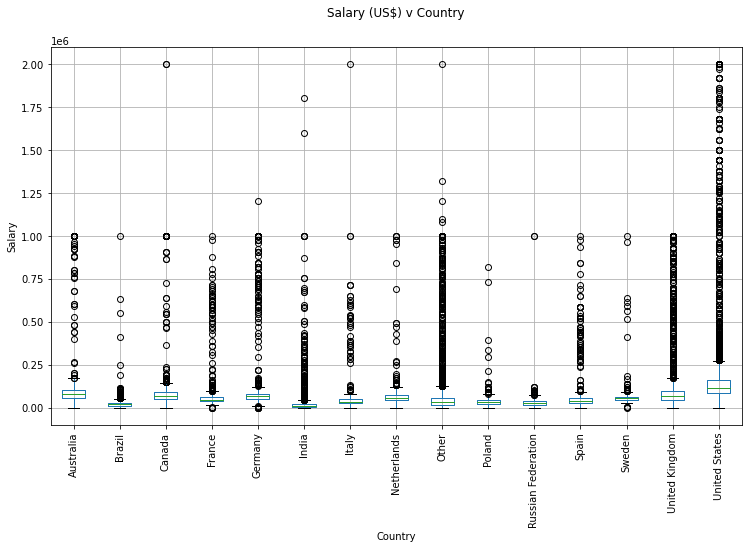

In [265]:
fig, ax = plt.subplots(1,1, figsize=(12, 7))
df.boxplot('Salary', 'Country', ax=ax)
plt.suptitle('Salary (US$) v Country')
plt.title('')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show()

In [266]:
df = df[df["Salary"] <= 250000]
df = df[df["Salary"] >= 10000]
df = df[df['Country'] != 'Other']

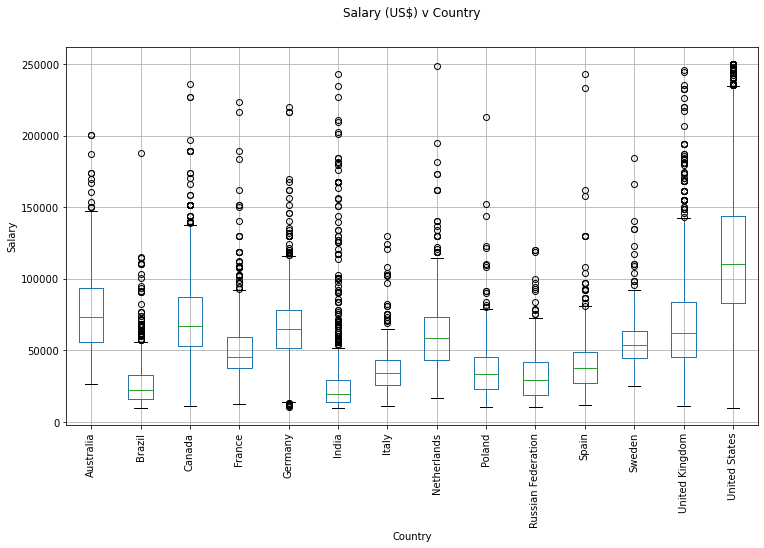

In [267]:
fig, ax = plt.subplots(1,1, figsize=(12, 7))
df.boxplot('Salary', 'Country', ax=ax)
plt.suptitle('Salary (US$) v Country')
plt.title('')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show()

In [268]:
df["YearsCodePro"].unique()

array(['13', '4', '2', '7', '1', '3', '20', '10', '12', '29', '6', '28',
       '8', '23', '15', '25', '9', '11', 'Less than 1 year', '5', '21',
       '16', '18', '14', '32', '19', '22', '38', '30', '26', '27', '17',
       '24', '34', '35', '33', '36', '40', '39', '31', '37', '41', '45',
       '42', 'More than 50 years', '44', '43', '50', '49'], dtype=object)

In [269]:
def clean_experience(x):
    if x ==  'More than 50 years':
        return 50
    if x == 'Less than 1 year':
        return 0.5
    return float(x)

df['YearsCodePro'] = df['YearsCodePro'].apply(clean_experience)

In [270]:
df["EdLevel"].unique()

array(['Bachelor’s degree (B.A., B.S., B.Eng., etc.)',
       'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
       'Some college/university study without earning a degree',
       'Associate degree (A.A., A.S., etc.)',
       'Professional degree (JD, MD, etc.)',
       'Other doctoral degree (Ph.D., Ed.D., etc.)'], dtype=object)

In [271]:
def clean_education(x):
    if 'Bachelor’s degree' in x:
        return 'Bachelor’s degree'
    if 'Master’s degree' in x:
        return 'Master’s degree'
    if 'Professional degree' in x or 'Other doctoral' in x:
        return 'Post grad'
    return 'Less than a Bachelors'

df['EdLevel'] = df['EdLevel'].apply(clean_education)

In [272]:
df["EdLevel"].unique()

array(['Bachelor’s degree', 'Master’s degree', 'Less than a Bachelors',
       'Post grad'], dtype=object)

In [273]:
df["UndergradMajor"].unique()

array(['Computer science, computer engineering, or software engineering',
       'Mathematics or statistics',
       'Another engineering discipline (such as civil, electrical, mechanical, etc.)',
       'Information systems, information technology, or system administration',
       'A natural science (such as biology, chemistry, physics, etc.)',
       'Fine arts or performing arts (such as graphic design, music, studio art, etc.)',
       'I never declared a major',
       'A humanities discipline (such as literature, history, philosophy, etc.)',
       'A social science (such as anthropology, psychology, political science, etc.)',
       'Web development or web design',
       'A health science (such as nursing, pharmacy, radiology, etc.)',
       'A business discipline (such as accounting, finance, marketing, etc.)'],
      dtype=object)

In [274]:
def clean_Undergrad(x):
    if 'Computer science' in x:
        return 'Computer science'
    if 'Mathematics' in x:
        return 'Mathematics'
    if 'information technology' in x:
        return 'information technology'
    if 'Another engineering discipline' in x:
        return 'Another engineering discipline'
    if 'A business discipline' in x:
        return 'A business discipline'
    if 'I never declared a major' in x:
        return 'Id rather not say'
    if 'Web development' in x:
        return 'Web development'
    if 'A natural science' in x or 'Fine arts or performing arts' in x or 'A humanities discipline' in x or 'A social science' in x or'A health science' in x:
        return 'others'

df['UndergradMajor'] = df['UndergradMajor'].apply(clean_Undergrad)

In [275]:
df["UndergradMajor"].unique()

array(['Computer science', 'Mathematics',
       'Another engineering discipline', 'information technology',
       'others', 'Id rather not say', 'Web development',
       'A business discipline'], dtype=object)

In [276]:
from sklearn.preprocessing import LabelEncoder
le_education = LabelEncoder()
df['EdLevel'] = le_education.fit_transform(df['EdLevel'])
df["EdLevel"].unique()
#le.classes_

array([0, 2, 1, 3])

In [277]:
le_country = LabelEncoder()
df['Country'] = le_country.fit_transform(df['Country'])
df["Country"].unique()

array([13, 12, 10,  4,  2,  6,  1,  3,  7,  5, 11,  8,  0,  9])

In [278]:
le_UndergradMajor = LabelEncoder()
df['UndergradMajor'] = le_UndergradMajor.fit_transform(df['UndergradMajor'])
df["UndergradMajor"].unique()

array([2, 4, 1, 6, 7, 3, 5, 0])

In [279]:
X = df.drop("Salary", axis=1)
y = df["Salary"]

In [280]:
X

,Country,EdLevel,YearsCodePro,UndergradMajor
7,13,0,13.0,2
9,12,2,4.0,4
10,12,0,2.0,2
11,10,1,7.0,4
13,13,1,1.0,2
...,...,...,...,...
64113,13,1,15.0,4
64116,13,0,6.0,2
64122,13,1,4.0,5
64127,13,3,12.0,1


In [281]:
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()
linear_reg.fit(X, y.values)

LinearRegression()

In [282]:
y_pred = linear_reg.predict(X)

In [283]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
error = np.sqrt(mean_squared_error(y, y_pred))

In [284]:
error

39404.54535594627

In [285]:
from sklearn.tree import DecisionTreeRegressor
dec_tree_reg = DecisionTreeRegressor(random_state=0)
dec_tree_reg.fit(X, y.values)

DecisionTreeRegressor(random_state=0)

In [286]:
y_pred = dec_tree_reg.predict(X)

In [287]:
error = np.sqrt(mean_squared_error(y, y_pred))
print("${:,.02f}".format(error))

$27,147.48


In [288]:
from sklearn.ensemble import RandomForestRegressor
random_forest_reg = RandomForestRegressor(random_state=0)
random_forest_reg.fit(X, y.values)

RandomForestRegressor(random_state=0)

In [289]:
y_pred = random_forest_reg.predict(X)

In [290]:
error = np.sqrt(mean_squared_error(y, y_pred))
print("${:,.02f}".format(error))

$27,476.56


In [291]:
from sklearn.model_selection import GridSearchCV

max_depth = [None, 2,4,6,8,10,12]
parameters = {"max_depth": max_depth}

regressor = DecisionTreeRegressor(random_state=0)
gs = GridSearchCV(regressor, parameters, scoring='neg_mean_squared_error')
gs.fit(X, y.values)

GridSearchCV(estimator=DecisionTreeRegressor(random_state=0),
             param_grid={'max_depth': [None, 2, 4, 6, 8, 10, 12]},
             scoring='neg_mean_squared_error')

In [292]:
regressor = gs.best_estimator_

regressor.fit(X, y.values)
y_pred = regressor.predict(X)
error = np.sqrt(mean_squared_error(y, y_pred))
print("${:,.02f}".format(error))

$31,079.05


In [293]:
X

,Country,EdLevel,YearsCodePro,UndergradMajor
7,13,0,13.0,2
9,12,2,4.0,4
10,12,0,2.0,2
11,10,1,7.0,4
13,13,1,1.0,2
...,...,...,...,...
64113,13,1,15.0,4
64116,13,0,6.0,2
64122,13,1,4.0,5
64127,13,3,12.0,1


In [294]:
# country, edlevel, yearscode
X = np.array([["United States", 'Master’s degree', 15 ,'Computer science']])
X

array([['United States', 'Master’s degree', '15', 'Computer science']],
      dtype='<U16')

In [295]:
X[:, 0] = le_country.transform(X[:,0])
X[:, 1] = le_education.transform(X[:,1])
X[:, 3] = le_UndergradMajor.transform(X[:,3])
X = X.astype(float)
X

array([[13.,  2., 15.,  2.]])

In [296]:
y_pred = regressor.predict(X)
y_pred

C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([137356.20833333])

In [297]:
import pickle

In [299]:
data = {"model": regressor, "le_country": le_country, "le_education": le_education , "le_UndergradMajor" : le_UndergradMajor}
with open('saved_steps_2.pkl', 'wb') as file:
    pickle.dump(data, file)

In [300]:
with open('saved_steps_2.pkl', 'rb') as file:
    data = pickle.load(file)

regressor_loaded = data["model"]
le_country = data["le_country"]
le_education = data["le_education"]
le_UndergradMajor = data["le_UndergradMajor"]

In [301]:
y_pred = regressor_loaded.predict(X)
y_pred

C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([137356.20833333])